In [1]:
# @title Data retrieval
import os, requests

fname = 'memory_nback.npz'
url = "https://osf.io/xfc7e/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [2]:
import math
from scipy import signal

In [3]:
# @title Install packages (`nilearn`, `nimare`, `duecredit`), import `matplotlib` and set defaults
# install packages to visualize brains and electrode locations
!pip install nilearn --quiet
!pip install nimare --quiet
!pip install duecredit --quiet

from matplotlib import rcParams
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [4]:
# @title Data loading
import numpy as np

alldat = np.load(fname, allow_pickle=True)['dat']

# Select just one of the recordings here. This is subject 1, block 1.
dat_11 = alldat[1][1]

print(dat_11.keys())

dict_keys(['V', 't_off', 'locs', 'srate', 'scale_uv', 't_on', 'target', 'stim_id', 'response', 'rt', 'expinfo', 'hemisphere', 'lobe', 'gyrus', 'Brodmann_Area'])


In [28]:
dat_filt = alldat[1][1]
V_ = dat_filt['V'].astype('float32') # always convert the voltage data to float32!

# bandpass filter between 4 and 8 Hz
b, a = signal.butter(3, [4,8], btype='bandpass', fs=1000)
V_filt = signal.filtfilt(b, a, V_, 0)

# normalize each channel so its mean power is 1
V_filt = V_filt/V_filt.mean(0)

In [40]:
### FOR LOOKING AT ALL CHANNELS ###

# divide into trials and average
nt, nchan = V_filt.shape
nstim = len(dat_filt['t_on'])

# use a timerange from 400ms before to 1600ms after the stimulus onset
trange = np.arange(-500, 1000)
ts = dat_filt['t_on'][:, np.newaxis] + trange
V_epochs = np.reshape(V_filt[ts, :], (nstim, 1500, nchan))

V_resp = (V_epochs[dat_filt['response'] == 1]).mean(0)
V_base = (V_epochs[dat_filt['response'] == 0]).mean(0)



In [123]:
# if you just want to look at one channel at a time
V_channel = V_epochs[:,:,0]
print(V_epochs.shape)

(100, 1500, 64)


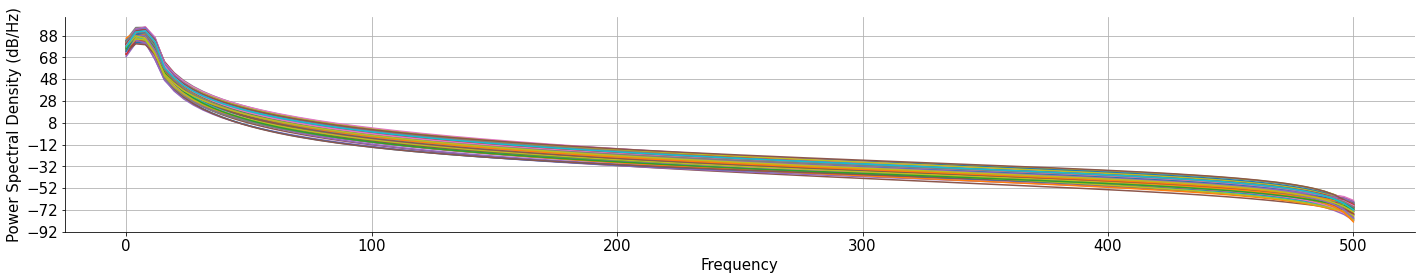

In [66]:
# again, just plotting PSD for one channel at a time
V_channel = V_epochs[:,:,3]

plt.figure()
for j in range(len(V_channel)):
    psd_chan = plt.psd(V_channel[j,:],Fs=1000)
plt.show()

In [108]:
#chen made this function 
def Average(lst):
    return sum(lst) / len(lst)

In [152]:
#initialize temp matrix to store the PSDs for each t_on
temp_ave_psd=np.zeros((100,129))
print(len(ave_psd[0]))

129


(0.0, 20.0)

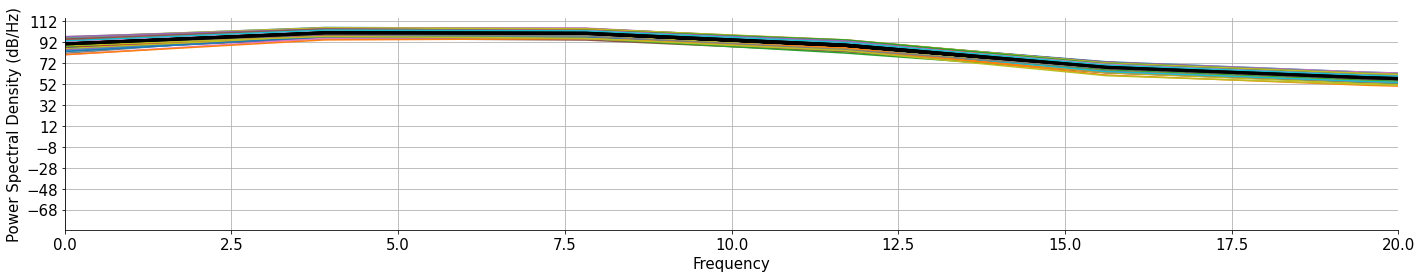

In [160]:
#this is to plot all PSDs for one channel
psd0_list=[]
freq0_list=[]
for j in range(100):
    Pxx, freqs=plt.psd(V_channel[j,:],Fs=1000)
    #plt.plot(psd[1],psd[0])
    Pxx=10*np.log10(Pxx)
    psd0_list.append(Pxx)
    freq0_list.append(freqs)
    temp_ave_psd[j] = (Average(psd0_list))   
    plt.plot(freq0_list[-1], Average(psd0_list),color='k',lw=3)
ave_psd = np.mean(temp_ave_psd,axis=0)
plt.xlim([0, 20])
#plt.ylim([0,100])


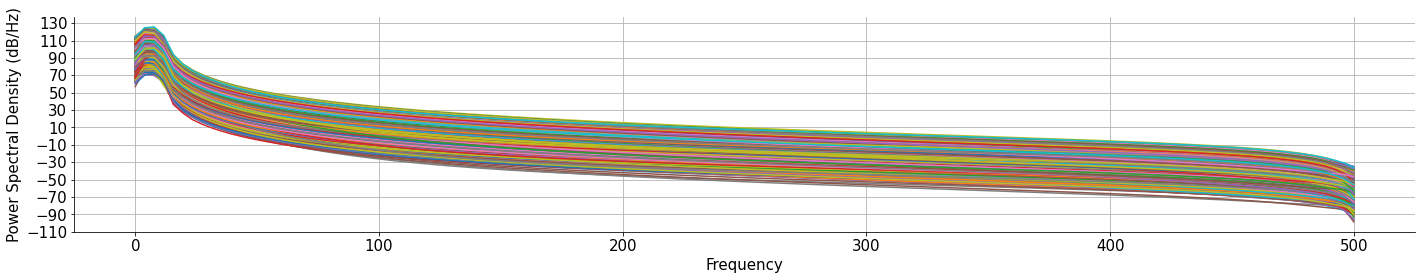

In [165]:
# this is to create and plot all PSDs from each trial in each channel
# WARNING: this takes a long time to run
temp_ave_chan = np.zeros((60,129))
for i in range(60):
    psd0_list=[]
    freq0_list=[]
    for j in range(100):
        Pxx, freqs=plt.psd(V_epochs[j,:,i],Fs=1000)
        #plt.plot(psd[1],psd[0])
        Pxx=10*np.log10(Pxx)
        psd0_list.append(Pxx)
        freq0_list.append(freqs)
        temp_ave_psd[j] = (Average(psd0_list))   
        #plt.plot(freq0_list[-1], Average(psd0_list),color='k',lw=3)
    ave_psd = np.mean(temp_ave_psd,axis=0)
    
    #this matrix has the average PSD from each channel, averaged across trials
    temp_ave_chan[i] = ave_psd



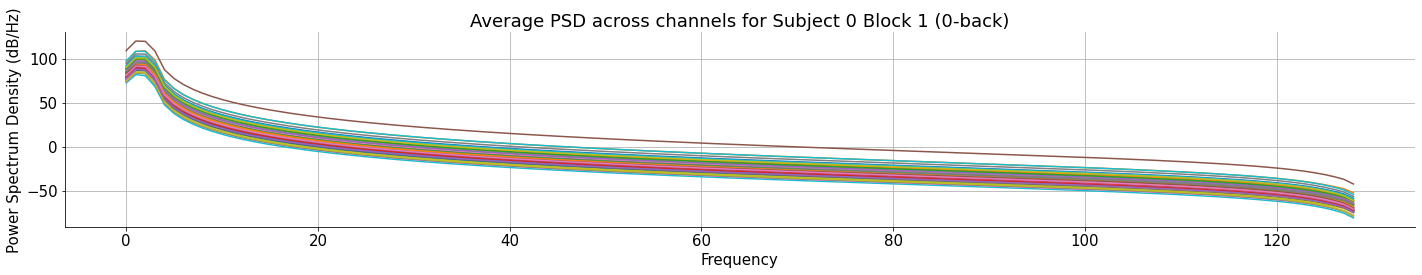

In [177]:
#plotting just the average PSD for each channel
plt.plot(temp_ave_chan.T);
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum Density (dB/Hz)');
plt.grid()
plt.title('Average PSD across channels for Subject 0 Block 1 (0-back)');

In [ ]:
### random code down here pls ignore###

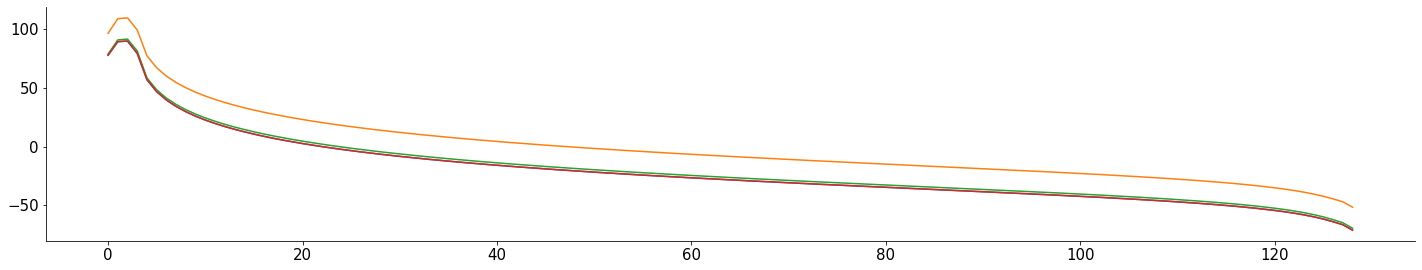

In [104]:
plt.figure()
for j in range(len(ave_psd)):
    plt.plot(ave_psd[j])
plt.show()

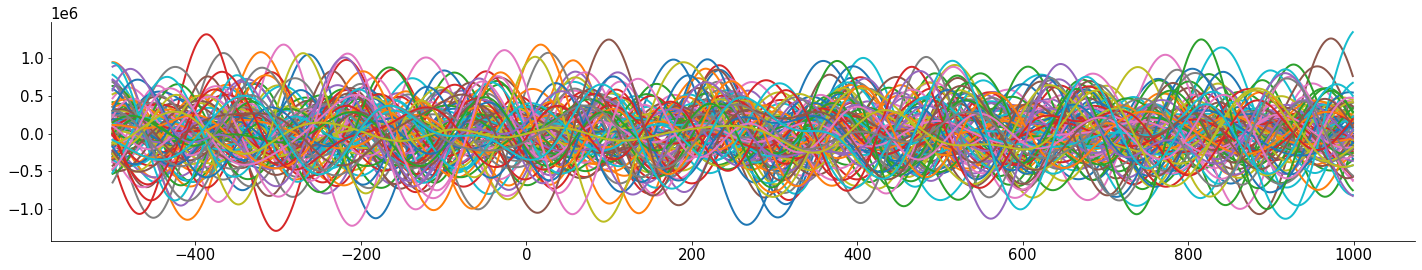

In [54]:
plt.figure()
for j in range(len(V_channel)):
    plt.plot(trange, V_channel[j,:], lw=2)
plt.show()

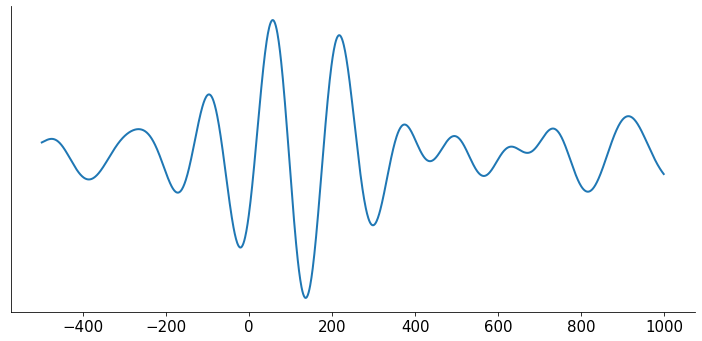

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(trange, V_channel[1,:], lw=2)
#plt.plot(trange, V_base, lw=2)
#plt.title('ch%d'%j)
plt.yticks([])
#plt.ylim([0, 3])
plt.show()